In [99]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt

# Initialize a dictionary to store the results
results = {}

# Traverse the directory and read all .txt files
for filename in os.listdir('./outputs'):
    if filename.endswith('.txt'):
        filepath = os.path.join('./outputs', filename)
        with open(filepath, 'r') as file:
            content = file.read()

        # Extract the required values using regular expressions
        input_matrix = re.search(r'input matrix A: \(\s*(\d+),\s*(\d+)\s*\) nnz = (\d+)', content)
        # compression_rate = re.search(r'Compression rate = ([\d.]+)', content)
        gflops = re.search(r'gflops = ([\d.]+)', content)

        if input_matrix  and gflops:
            rows, cols, nnz = input_matrix.groups()
            # compression_rate = compression_rate.group(1)
            gflops = gflops.group(1)
            print(f"File: {filename}")
            print(f"Input matrix A: ({rows}, {cols}), nnz = {nnz}")
            # print(f"Compression rate = {compression_rate}")
            print(f"GFLOPS = {gflops}")
            results[filename] = {
                'rows': rows,
                'cols': cols,
                'nnz': nnz,
                # 'compression_rate': compression_rate,
                'gflops': gflops
            }
        else:
            print(f"Required values not found in the file: {filename}")

# Print the results dictionary
print(results)

File: exdata_1.txt
Input matrix A: (6001, 6001), nnz = 2269501
GFLOPS = 23.13
File: nv1.txt
Input matrix A: (75468, 75468), nnz = 2449194
GFLOPS = 0.68
File: bcsstm24.txt
Input matrix A: (3562, 3562), nnz = 3562
GFLOPS = 0.00
File: gyro.txt
Input matrix A: (17361, 17361), nnz = 1021159
GFLOPS = 9.13
File: gyro_m.txt
Input matrix A: (17361, 17361), nnz = 340431
GFLOPS = 1.71
Required values not found in the file: Delor295K.txt
File: c-53.txt
Input matrix A: (30235, 30235), nnz = 372213
GFLOPS = 7.76
File: can_445.txt
Input matrix A: (445, 445), nnz = 3809
GFLOPS = 0.01
File: bcsstm11.txt
Input matrix A: (1473, 1473), nnz = 1473
GFLOPS = 0.00
File: pkustk07.txt
Input matrix A: (16860, 16860), nnz = 2418804
GFLOPS = 11.99
File: nemeth12.txt
Input matrix A: (9506, 9506), nnz = 446818
GFLOPS = 8.60
File: jagmesh2.txt
Input matrix A: (1009, 1009), nnz = 6865
GFLOPS = 0.01
File: poisson3Db.txt
Input matrix A: (85623, 85623), nnz = 2374949
GFLOPS = 0.06
File: watt_2.txt
Input matrix A: (1856, 

In [100]:
import pandas as pd

# Convert the results dictionary to a DataFrame
df_results = pd.DataFrame.from_dict(results, orient='index')

# Reset the index to have filename as a column
df_results.reset_index(inplace=True)
df_results.rename(columns={'index': 'filename'}, inplace=True)

# Add a new column 'MatrixA' by removing the '.txt' suffix from 'filename'
df_results['MatrixA'] = df_results['filename'].str.replace('.txt', '')

# Print the DataFrame with the specified headers
print(df_results[['filename', 'MatrixA','rows', 'cols', 'nnz','gflops']].to_string(index=True))

            filename       MatrixA    rows    cols      nnz gflops
0       exdata_1.txt      exdata_1    6001    6001  2269501  23.13
1            nv1.txt           nv1   75468   75468  2449194   0.68
2       bcsstm24.txt      bcsstm24    3562    3562     3562   0.00
3           gyro.txt          gyro   17361   17361  1021159   9.13
4         gyro_m.txt        gyro_m   17361   17361   340431   1.71
5           c-53.txt          c-53   30235   30235   372213   7.76
6        can_445.txt       can_445     445     445     3809   0.01
7       bcsstm11.txt      bcsstm11    1473    1473     1473   0.00
8       pkustk07.txt      pkustk07   16860   16860  2418804  11.99
9       nemeth12.txt      nemeth12    9506    9506   446818   8.60
10      jagmesh2.txt      jagmesh2    1009    1009     6865   0.01
11    poisson3Db.txt    poisson3Db   85623   85623  2374949   0.06
12        watt_2.txt        watt_2    1856    1856    11550   0.05
13      1138_bus.txt      1138_bus    1138    1138     4054   

In [101]:
mem_cost_path="../data/mem-cost_aa.csv"
# Read the CSV file into a DataFrame
df_mem_cost_aa = pd.read_csv(mem_cost_path, header=None)

# Add headers to the DataFrame
df_mem_cost_aa.columns = ['filename', 'rows', 'cols', 'nnz', 'nnzCub', 'nnzC_computed', 'compression_rate', 'time_tile', 'gflops_tile']

# Remove directory prefix and replace .mtx with .txt in the filename column
df_mem_cost_aa['filename'] = df_mem_cost_aa['filename'].str.replace(r'.*/', '').str.replace('.mtx', '.txt')

# Print the DataFrame to verify the changes
df_mem_cost_aa

,filename,rows,cols,nnz,nnzCub,nnzC_computed,compression_rate,time_tile,gflops_tile
0,1138_bus.txt,1138,1138,4054,18138,11069,1.638630,0.050739,0.072035
1,bcsstm11.txt,1473,1473,1473,1473,1473,1.000000,0.022480,0.017972
2,bcsstm24.txt,3562,3562,3562,3562,3562,1.000000,0.054356,0.043341
3,c-53.txt,30235,30235,372213,191127691,43288038,4.415254,4.374981,4.309583
4,can_445.txt,445,445,3809,33307,11193,2.975699,0.045292,0.043489
5,delaunay_n17.txt,131072,131072,786352,4954586,2699865,1.835124,9.499088,12.458885
6,exdata_1.txt,6001,6001,2269501,3390807001,11270172,300.865595,25.995274,20.057935
7,gyro.txt,17361,17361,1021159,77897567,6960755,11.190965,11.752468,10.850692
8,gyro_m.txt,17361,17361,340431,8657751,2083518,4.155352,3.962154,4.983176
9,jagmesh2.txt,1009,1009,6865,47075,18179,2.589526,0.082417,0.085984


In [102]:
# Merge df_results with df_mem_cost_aa to add the compression_rate column
df_results = df_results.merge(df_mem_cost_aa[['filename', 'compression_rate']], on='filename', how='left')

# Print the DataFrame with the added compression_rate column
# print(df_results[['filename', 'MatrixA', 'rows', 'cols', 'nnz', 'gflops', 'compression_rate']].to_string(index=True))
df_results

,filename,rows,cols,nnz,gflops,MatrixA,compression_rate
0,exdata_1.txt,6001,6001,2269501,23.13,exdata_1,300.865595
1,nv1.txt,75468,75468,2449194,0.68,nv1,4.708955
2,bcsstm24.txt,3562,3562,3562,0.00,bcsstm24,1.000000
3,gyro.txt,17361,17361,1021159,9.13,gyro,11.190965
4,gyro_m.txt,17361,17361,340431,1.71,gyro_m,4.155352
5,c-53.txt,30235,30235,372213,7.76,c-53,4.415254
6,can_445.txt,445,445,3809,0.01,can_445,2.975699
7,bcsstm11.txt,1473,1473,1473,0.00,bcsstm11,1.000000
8,pkustk07.txt,16860,16860,2418804,11.99,pkustk07,20.636823
9,nemeth12.txt,9506,9506,446818,8.60,nemeth12,21.897819


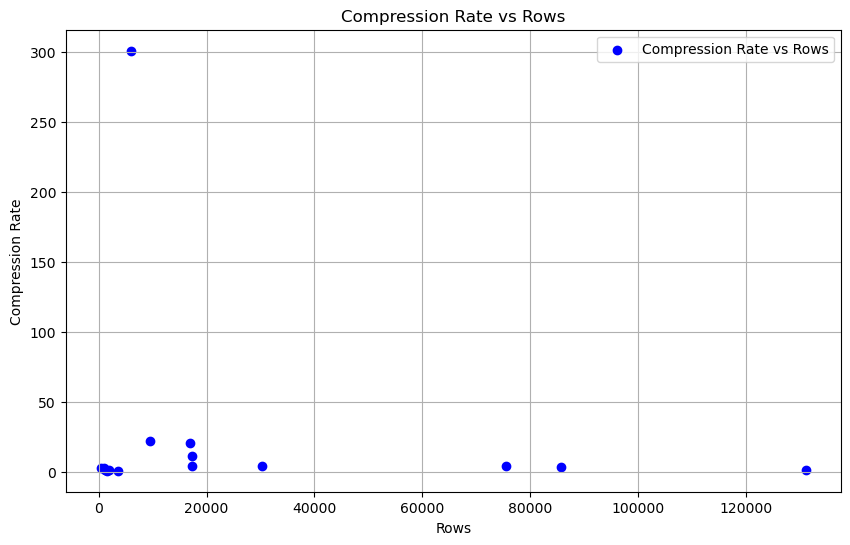

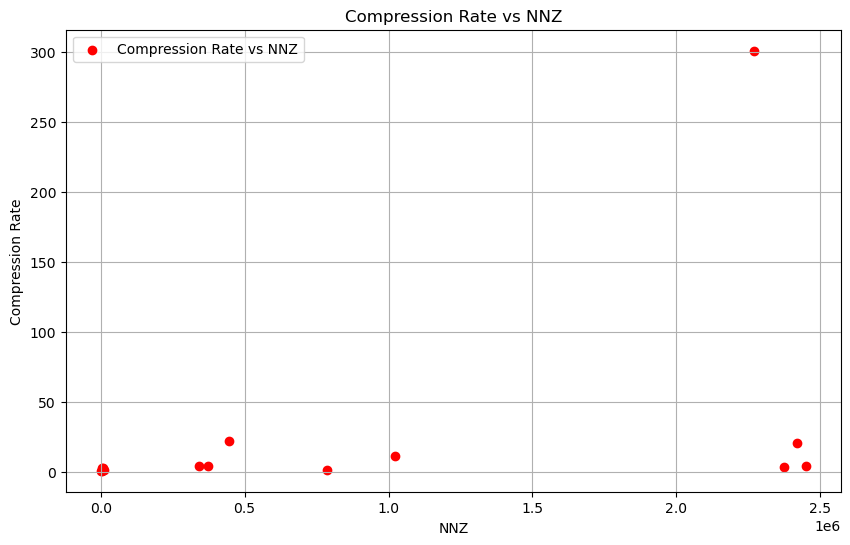

In [103]:
# Convert the columns to numeric types for plotting
df_results['compression_rate'] = pd.to_numeric(df_results['compression_rate'])
df_results['rows'] = pd.to_numeric(df_results['rows'])
df_results['nnz'] = pd.to_numeric(df_results['nnz'])

# Create a scatter plot to show the relationship between compression_rate and rows
plt.figure(figsize=(10, 6))
plt.scatter(df_results['rows'], df_results['compression_rate'], c='blue', label='Compression Rate vs Rows')
plt.xlabel('Rows')
plt.ylabel('Compression Rate')
plt.title('Compression Rate vs Rows')
plt.legend()
plt.grid(True)
plt.show()

# Create a scatter plot to show the relationship between compression_rate and nnz
plt.figure(figsize=(10, 6))
plt.scatter(df_results['nnz'], df_results['compression_rate'], c='red', label='Compression Rate vs NNZ')
plt.xlabel('NNZ')
plt.ylabel('Compression Rate')
plt.title('Compression Rate vs NNZ')
plt.legend()
plt.grid(True)
plt.show()

In [104]:
# 计算 C=AA^T 矩阵的压缩率
results_aat = {}

# Traverse the directory and read all .txt files
for filename in os.listdir('./outputs_aat'):
    if filename.endswith('.txt'):
        filepath = os.path.join('./outputs_aat', filename)
        with open(filepath, 'r') as file:
            content = file.read()

        # Extract the required values using regular expressions
        input_matrix = re.search(r'input matrix A: \(\s*(\d+),\s*(\d+)\s*\) nnz = (\d+)', content)
        # compression_rate = re.search(r'Compression rate = ([\d.]+)', content)
        gflops = re.search(r'gflops = ([\d.]+)', content)

        if input_matrix  and gflops:
            rows, cols, nnz = input_matrix.groups()
            # compression_rate = compression_rate.group(1)
            gflops = gflops.group(1)
            print(f"File: {filename}")
            print(f"Input matrix A: ({rows}, {cols}), nnz = {nnz}")
            # print(f"Compression rate = {compression_rate}")
            print(f"GFLOPS = {gflops}")
            results_aat[filename] = {
                'rows': rows,
                'cols': cols,
                'nnz': nnz,
                'gflops': gflops
            }
        else:
            print(f"Required values not found in the file: {filename}")

# Print the results dictionary
print(results_aat)

File: exdata_1.txt
Input matrix A: (6001, 6001), nnz = 2269501
GFLOPS = 24.19
File: nv1.txt
Input matrix A: (75468, 75468), nnz = 2449194
GFLOPS = 0.75
File: bcsstm24.txt
Input matrix A: (3562, 3562), nnz = 3562
GFLOPS = 0.00
File: gyro.txt
Input matrix A: (17361, 17361), nnz = 1021159
GFLOPS = 9.31
File: gyro_m.txt
Input matrix A: (17361, 17361), nnz = 340431
GFLOPS = 1.61
File: c-53.txt
Input matrix A: (30235, 30235), nnz = 372213
GFLOPS = 7.65
File: can_445.txt
Input matrix A: (445, 445), nnz = 3809
GFLOPS = 0.01
File: bcsstm11.txt
Input matrix A: (1473, 1473), nnz = 1473
GFLOPS = 0.00
File: pkustk07.txt
Input matrix A: (16860, 16860), nnz = 2418804
GFLOPS = 11.72
File: nemeth12.txt
Input matrix A: (9506, 9506), nnz = 446818
GFLOPS = 8.00
File: jagmesh2.txt
Input matrix A: (1009, 1009), nnz = 6865
GFLOPS = 0.03
File: poisson3Db.txt
Input matrix A: (85623, 85623), nnz = 2374949
GFLOPS = 0.06
File: watt_2.txt
Input matrix A: (1856, 1856), nnz = 11550
GFLOPS = 0.02
File: 1138_bus.txt
I

In [105]:
# Convert the results dictionary to a DataFrame
df_results_aat = pd.DataFrame.from_dict(results_aat, orient='index')

# Reset the index to have filename as a column
df_results_aat.reset_index(inplace=True)
df_results_aat.rename(columns={'index': 'filename'}, inplace=True)

# Add a new column 'MatrixA' by removing the '.txt' suffix from 'filename'
df_results_aat['MatrixA'] = df_results_aat['filename'].str.replace('.txt', '')

# Print the DataFrame with the specified headers
print(df_results_aat[['filename', 'MatrixA', 'rows', 'cols', 'nnz', 'gflops']].to_string(index=True))

            filename       MatrixA    rows    cols      nnz gflops
0       exdata_1.txt      exdata_1    6001    6001  2269501  24.19
1            nv1.txt           nv1   75468   75468  2449194   0.75
2       bcsstm24.txt      bcsstm24    3562    3562     3562   0.00
3           gyro.txt          gyro   17361   17361  1021159   9.31
4         gyro_m.txt        gyro_m   17361   17361   340431   1.61
5           c-53.txt          c-53   30235   30235   372213   7.65
6        can_445.txt       can_445     445     445     3809   0.01
7       bcsstm11.txt      bcsstm11    1473    1473     1473   0.00
8       pkustk07.txt      pkustk07   16860   16860  2418804  11.72
9       nemeth12.txt      nemeth12    9506    9506   446818   8.00
10      jagmesh2.txt      jagmesh2    1009    1009     6865   0.03
11    poisson3Db.txt    poisson3Db   85623   85623  2374949   0.06
12        watt_2.txt        watt_2    1856    1856    11550   0.02
13      1138_bus.txt      1138_bus    1138    1138     4054   

In [106]:
mem_cost_path="../data/mem-cost_aat.csv"
# Read the CSV file into a DataFrame
df_mem_cost_aat = pd.read_csv(mem_cost_path, header=None)

# Add headers to the DataFrame
df_mem_cost_aat.columns = ['filename', 'rows', 'cols', 'nnz', 'nnzCub', 'nnzC_computed', 'compression_rate', 'time_tile', 'gflops_tile']

# Remove directory prefix and replace .mtx with .txt in the filename column
# df_mem_cost_aat['filename'] = df_mem_cost_aat['filename'].str.replace(r'.*/', '').str.replace('.mtx', '.txt')

# Print the DataFrame to verify the changes
df_mem_cost_aat

,filename,rows,cols,nnz,nnzCub,nnzC_computed,compression_rate,time_tile,gflops_tile
0,1138_bus.txt,1138,1138,4054,18138,11069,1.638630,0.050739,0.072035
1,bcsstm11.txt,1473,1473,1473,1473,1473,1.000000,0.022480,0.017972
2,bcsstm24.txt,3562,3562,3562,3562,3562,1.000000,0.054356,0.043341
3,c-53.txt,30235,30235,372213,191127691,43285248,4.415539,4.374981,4.309583
4,can_445.txt,445,445,3809,33307,11193,2.975699,0.045292,0.043489
5,delaunay_n17.txt,131072,131072,786352,4954586,2699889,1.835107,9.499088,12.458885
6,exdata_1.txt,6001,6001,2269501,3390807001,11270108,300.867303,25.995274,20.057935
7,gyro.txt,17361,17361,1021159,77897567,6963436,11.186657,11.752468,10.850692
8,gyro_m.txt,17361,17361,340431,8657751,2083714,4.154961,3.962154,4.983176
9,jagmesh2.txt,1009,1009,6865,47075,18179,2.589526,0.082417,0.085984


In [107]:
# Merge df_results with df_mem_cost_aa to add the compression_rate column
df_results_aat = df_results_aat.merge(df_mem_cost_aat[['filename', 'compression_rate']], on='filename', how='left')

# Print the DataFrame with the added compression_rate column
# print(df_results[['filename', 'MatrixA', 'rows', 'cols', 'nnz', 'gflops', 'compression_rate']].to_string(index=True))
df_results_aat

,filename,rows,cols,nnz,gflops,MatrixA,compression_rate
0,exdata_1.txt,6001,6001,2269501,24.19,exdata_1,300.867303
1,nv1.txt,75468,75468,2449194,0.75,nv1,4.706703
2,bcsstm24.txt,3562,3562,3562,0.00,bcsstm24,1.000000
3,gyro.txt,17361,17361,1021159,9.31,gyro,11.186657
4,gyro_m.txt,17361,17361,340431,1.61,gyro_m,4.154961
5,c-53.txt,30235,30235,372213,7.65,c-53,4.415539
6,can_445.txt,445,445,3809,0.01,can_445,2.975699
7,bcsstm11.txt,1473,1473,1473,0.00,bcsstm11,1.000000
8,pkustk07.txt,16860,16860,2418804,11.72,pkustk07,20.650976
9,nemeth12.txt,9506,9506,446818,8.00,nemeth12,21.897819


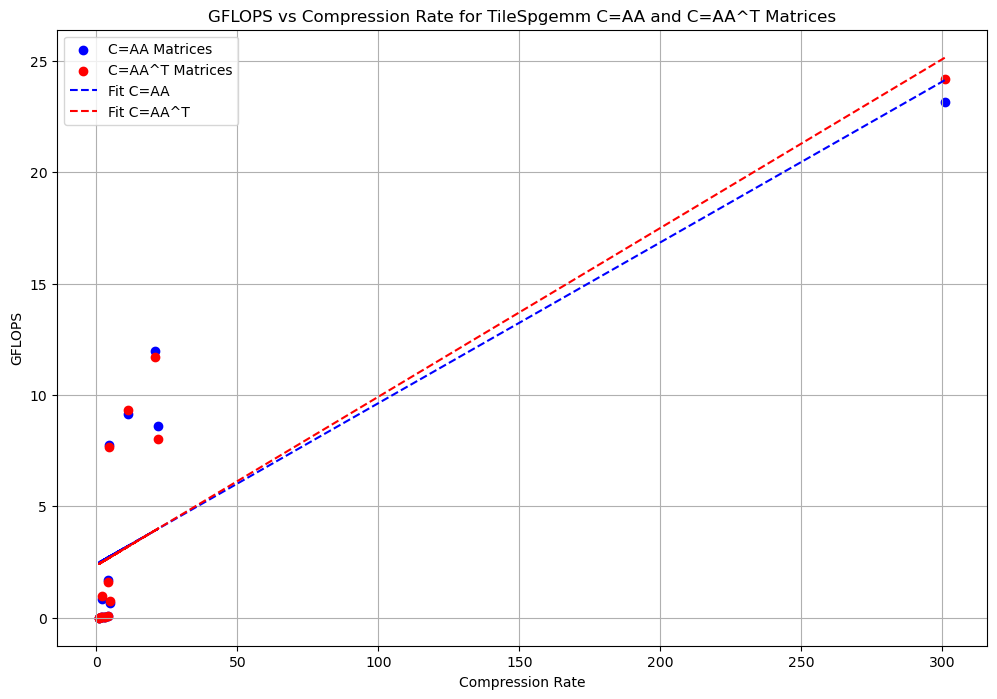

In [108]:
# Convert the columns to numeric types for plotting
df_results_aat['compression_rate'] = pd.to_numeric(df_results_aat['compression_rate'])
df_results_aat['gflops'] = pd.to_numeric(df_results_aat['gflops'])
df_results['gflops'] = pd.to_numeric(df_results['gflops'])

# Create a plot to show the relationship between gflops and compression_rate for both dataframes
plt.figure(figsize=(12, 8))

# Scatter plot for df_results
plt.scatter(df_results['compression_rate'], df_results['gflops'], label='C=AA Matrices', color='blue')

# Scatter plot for df_results_aat
plt.scatter(df_results_aat['compression_rate'], df_results_aat['gflops'], label='C=AA^T Matrices', color='red')
# Perform linear regression for df_results
slope1, intercept1 = np.polyfit(df_results['compression_rate'], df_results['gflops'], 1)
fit_line1 = slope1 * df_results['compression_rate'] + intercept1
plt.plot(df_results['compression_rate'], fit_line1, color='blue', linestyle='--', label='Fit C=AA')

# Perform linear regression for df_results_aat
slope2, intercept2 = np.polyfit(df_results_aat['compression_rate'], df_results_aat['gflops'], 1)
fit_line2 = slope2 * df_results_aat['compression_rate'] + intercept2
plt.plot(df_results_aat['compression_rate'], fit_line2, color='red', linestyle='--', label='Fit C=AA^T')
# Add labels and title
plt.xlabel('Compression Rate')
plt.ylabel('GFLOPS')
plt.title('GFLOPS vs Compression Rate for TileSpgemm C=AA and C=AA^T Matrices')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [109]:
# 计算 cusparse 稀疏矩阵乘法的性能 
results_cusparse = {}

# Traverse the directory and read all .txt files
for filename in os.listdir('./outputs_cusparse'):
    if filename.endswith('.txt'):
        filepath = os.path.join('./outputs_cusparse', filename)
        with open(filepath, 'r') as file:
            content = file.read()

        # Extract the required values using regular expressions
        input_matrix = re.search(r'input matrix A: \(\s*(\d+),\s*(\d+)\s*\) nnz = (\d+)', content)
        compression_rate = re.search(r'Compression rate = ([\d.]+)', content)
        gflops = re.search(r'GFlops = ([\d.]+)', content)

        if input_matrix and compression_rate and gflops:
            rows, cols, nnz = input_matrix.groups()
            compression_rate = compression_rate.group(1)
            gflops = gflops.group(1)
            print(f"File: {filename}")
            print(f"Input matrix A: ({rows}, {cols}), nnz = {nnz}")
            print(f"Compression rate = {compression_rate}")
            print(f"GFLOPS = {gflops}")
            results_cusparse[filename] = {
                'rows': rows,
                'cols': cols,
                'nnz': nnz,
                'compression_rate': compression_rate,
                'gflops': gflops
            }
        else:
            print(f"Required values not found in the file: {filename}")

# Print the results dictionary
print(results_cusparse)

Required values not found in the file: exdata_1.txt
File: nv1.txt
Input matrix A: (75468, 75468), nnz = 2449194
Compression rate = 6.16
GFLOPS = 0.8257
File: bcsstm24.txt
Input matrix A: (3562, 3562), nnz = 3562
Compression rate = 1.00
GFLOPS = 0.0024
File: gyro.txt
Input matrix A: (17361, 17361), nnz = 1021159
Compression rate = 13.48
GFLOPS = 0.8984
File: gyro_m.txt
Input matrix A: (17361, 17361), nnz = 340431
Compression rate = 4.50
GFLOPS = 1.1613
File: c-53.txt
Input matrix A: (30235, 30235), nnz = 372213
Compression rate = 4.41
GFLOPS = 0.1068
File: can_445.txt
Input matrix A: (445, 445), nnz = 3809
Compression rate = 2.98
GFLOPS = 0.0091
File: bcsstm11.txt
Input matrix A: (1473, 1473), nnz = 1473
Compression rate = 1.00
GFLOPS = 0.0009
File: pkustk07.txt
Input matrix A: (16860, 16860), nnz = 2418804
Compression rate = 29.40
GFLOPS = 0.4416
File: nemeth12.txt
Input matrix A: (9506, 9506), nnz = 446818
Compression rate = 21.90
GFLOPS = 1.7338
File: jagmesh2.txt
Input matrix A: (10

In [110]:
# Convert the results dictionary to a DataFrame
df_results_cusparse = pd.DataFrame.from_dict(results_cusparse, orient='index')

# Reset the index to have filename as a column
df_results_cusparse.reset_index(inplace=True)
df_results_cusparse.rename(columns={'index': 'filename'}, inplace=True)

# Add a new column 'MatrixA' by removing the '.txt' suffix from 'filename'
df_results_cusparse['MatrixA'] = df_results_cusparse['filename'].str.replace('.txt', '')

# Print the DataFrame with the specified headers
print(df_results_cusparse[['filename', 'MatrixA', 'rows', 'cols', 'nnz', 'compression_rate', 'gflops']].to_string(index=True))
# df_results_cusparse

            filename       MatrixA    rows    cols      nnz compression_rate  gflops
0            nv1.txt           nv1   75468   75468  2449194             6.16  0.8257
1       bcsstm24.txt      bcsstm24    3562    3562     3562             1.00  0.0024
2           gyro.txt          gyro   17361   17361  1021159            13.48  0.8984
3         gyro_m.txt        gyro_m   17361   17361   340431             4.50  1.1613
4           c-53.txt          c-53   30235   30235   372213             4.41  0.1068
5        can_445.txt       can_445     445     445     3809             2.98  0.0091
6       bcsstm11.txt      bcsstm11    1473    1473     1473             1.00  0.0009
7       pkustk07.txt      pkustk07   16860   16860  2418804            29.40  0.4416
8       nemeth12.txt      nemeth12    9506    9506   446818            21.90  1.7338
9       jagmesh2.txt      jagmesh2    1009    1009     6865             2.59  0.0299
10    poisson3Db.txt    poisson3Db   85623   85623  2374949      

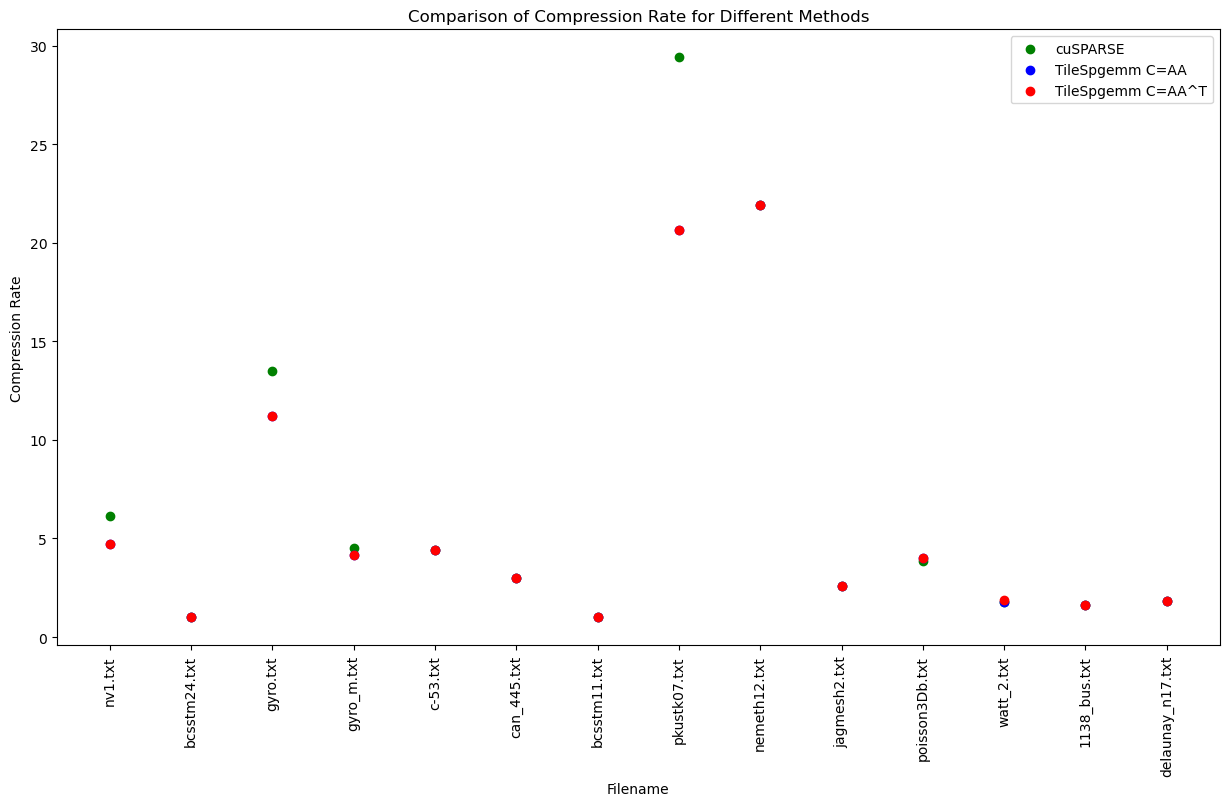

In [113]:
# 设置绘图的大小
plt.figure(figsize=(15, 8))

# Remove rows where filename is 'exdata_1.txt' in df_results and df_results_aat
df_results = df_results[df_results['filename'] != 'exdata_1.txt']
df_results_aat = df_results_aat[df_results_aat['filename'] != 'exdata_1.txt']

# 绘制 df_results_cusparse 的 compression_rate
plt.scatter(df_results_cusparse['filename'], df_results_cusparse['compression_rate'], label='cuSPARSE', color='green')

# 绘制 df_results 的 compression_rate
plt.scatter(df_results['filename'], df_results['compression_rate'], label='TileSpgemm C=AA', color='blue')

# 绘制 df_results_aat 的 compression_rate
plt.scatter(df_results_aat['filename'], df_results_aat['compression_rate'], label='TileSpgemm C=AA^T', color='red')

# 设置 x 轴标签
plt.xlabel('Filename')

# 设置 y 轴标签
plt.ylabel('Compression Rate')

# 设置图表标题
plt.title('Comparison of Compression Rate for Different Methods')

# 添加图例
plt.legend()

# 旋转 x 轴标签以便更好地显示
plt.xticks(rotation=90)

# 显示网格
# plt.grid(True)

# 显示图表
plt.show()

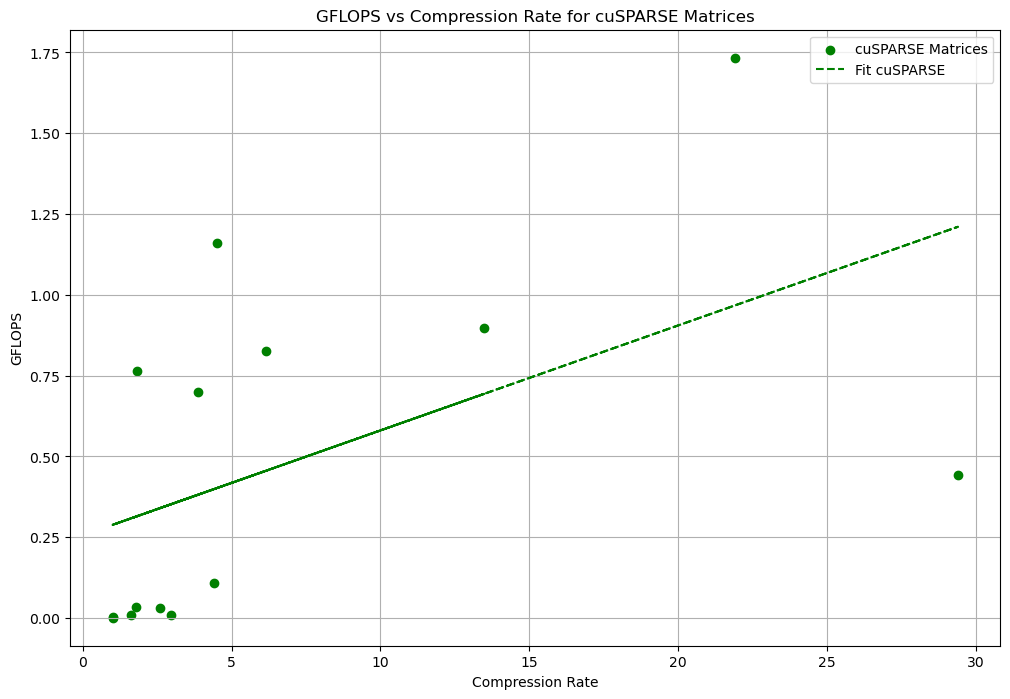

In [112]:
# Convert the columns to numeric types for plotting
df_results_cusparse['compression_rate'] = pd.to_numeric(df_results_cusparse['compression_rate'])
df_results_cusparse['gflops'] = pd.to_numeric(df_results_cusparse['gflops'])

# Create a plot to show the relationship between gflops and compression_rate for df_results_cusparse
plt.figure(figsize=(12, 8))

# Scatter plot for df_results_cusparse
plt.scatter(df_results_cusparse['compression_rate'], df_results_cusparse['gflops'], label='cuSPARSE Matrices', color='green')

# Perform linear regression for df_results_cusparse
slope, intercept = np.polyfit(df_results_cusparse['compression_rate'], df_results_cusparse['gflops'], 1)
fit_line = slope * df_results_cusparse['compression_rate'] + intercept
plt.plot(df_results_cusparse['compression_rate'], fit_line, color='green', linestyle='--', label='Fit cuSPARSE')

# Add labels and title
plt.xlabel('Compression Rate')
plt.ylabel('GFLOPS')
plt.title('GFLOPS vs Compression Rate for cuSPARSE Matrices')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
